In [2]:
# Import modules

import matplotlib.pyplot as plt
import os
from LaceyClass import LaceyMixingAnalyzer
from extrapolation import extrapolation
import numpy as np


simulations = {
    "1": os.path.abspath(os.path.join("..", '..', 'data', "rot_drum", "JKR_periodic_clean", "Rot_drum.dem")),
    "2": os.path.abspath(os.path.join("..", '..', "Rot_drum", "HM_10rpm_100k", "Rot_drum.dem"))

}    
# Initialise variables and call class
simulation = simulations["2"]
sim_path = os.path.dirname(simulation)

#simulation parameters
start_t = 1
end_t = 20
domain_x = (-0.07, 0.07)       
domain_y = (-0.025, 0.025)
domain_z = (-0.07, 0.07)
num_bins = 4
direction = "y"

extrap = extrapolation(start_t, end_t, simulation, domain_x, domain_y, domain_z, num_bins, direction)

In [3]:
kinetic_energies, peak_times, peak_index, highlight_y = extrap.kin_energies(0.0002, 5)


Analysing Kinetic Energies...


(-0.0021, -0.0015)

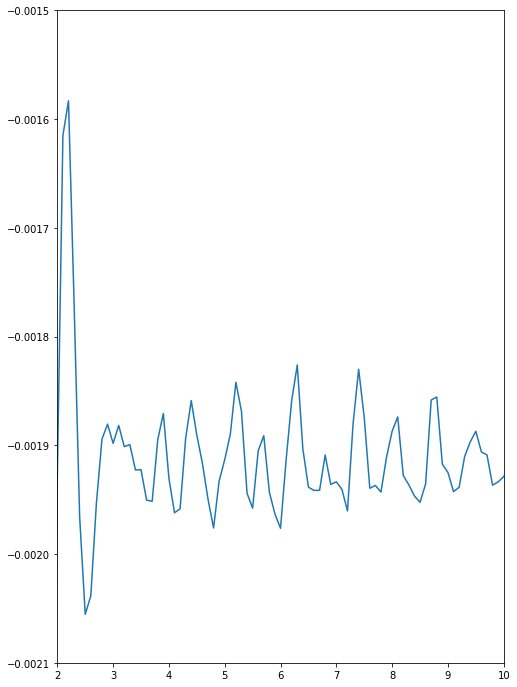

In [4]:
plt.figure(figsize=(8,12))
kin_e = np.column_stack((extrap.deck.timestepValues[extrap.start:], kinetic_energies))
plt.plot(kin_e[:,0], kin_e[:,1])

plt.scatter(peak_times, highlight_y, c="red")
x = (2,10)

plt.xlim(left=x[0], right=x[1])
plt.ylim(bottom=-0.0021, top=-0.0015)

In [5]:
extrap.find_nearest(extrap.deck.timestepValues, 4)

40

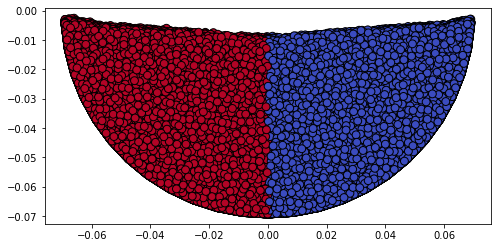

In [6]:
# Plot starting position

id_dict = extrap.id_dictionary(extrap.sim_time[0])
init_particles = extrap.get_particle_coords(extrap.sim_time[0])
plt.figure(figsize=(8,12))
extrap.plot_particles(init_particles, id_dict, True)
plt.show()

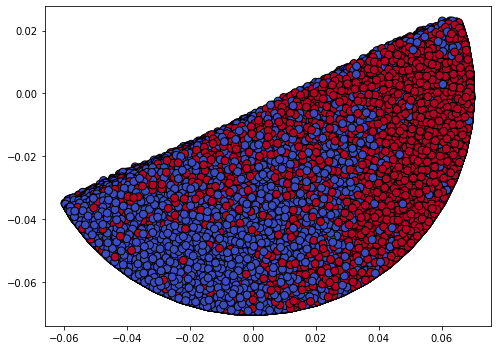

In [11]:
# Plot peak index 3 normal

plt.figure(figsize=(8,12))
actual_3 = extrap.plot_particles(extrap.get_particle_coords(200), id_dict, True)

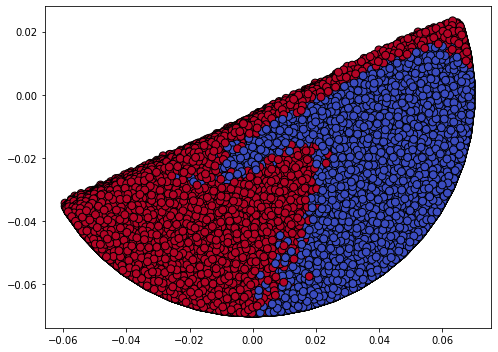

In [8]:
pos_dict_split = extrap.import_dict(sim_path, "peak_10y_split")
plt.figure(figsize=(8,12))
ex_3 = extrap.plot_particles(extrap.extrapolate_particles(extrap.get_particle_coords(40), pos_dict_split), id_dict, 1)

In [14]:
#get Lacey settings

with open(os.path.abspath(os.path.join("Lacey_settings.txt")), 'r') as file:
    preferences = file.readlines()
    minCoords = np.array([float(i) for i in str(preferences[1]).split(',')])
    maxCoords = np.array([float(i) for i in str(preferences[3]).split(',')])
    bins = np.array([int(i) for i in str(preferences[5]).split(',')])
    cut_off = float(preferences[7])
    plot = str(preferences[9])
    file.close()
    settings = True

lacey = LaceyMixingAnalyzer(minCoords, maxCoords, bins, simulation)



In [20]:
Lacey_index = np.zeros(lacey.deck.numTimesteps)
b_coords, div_size = lacey.grid()
cut_off = 0.001

get_lacey = False

if get_lacey:
    for i in extrap.sim_time:
            particles = extrap.plot_particles(extrap.get_particle_coords(i), id_dict, 0)

            mass_1, mass_2, conc = lacey.bining(b_coords, div_size, particles, cut_off)

            Lacey_index[i] = lacey.Lacey(mass_1, mass_2, conc, cut_off, len(particles))
            print("Timestep: " + str(lacey.deck.timestepValues[i]) + " (s)")


            if i == extrap.sim_time[-1]: 
                if plot == 'yes\n':
                    time = lacey.deck.timestepValues
                    lacey.render(particles, b_coords, "test", Lacey_index, time, div_size, simulation)
                lacey.write_out(Lacey_index, time, simulation, "test")

Timestep: 1.0000000302536256 (s)
Timestep: 1.1000019748121714 (s)
Timestep: 1.2000006834807173 (s)
Timestep: 1.3000026280392631 (s)
Timestep: 1.400001336707809 (s)
Timestep: 1.500000045376355 (s)
Timestep: 1.6000019899349007 (s)
Timestep: 1.7000006986034466 (s)
Timestep: 1.8000026431619924 (s)
Timestep: 1.9000013518305383 (s)
Timestep: 2.0000000604990844 (s)
Timestep: 2.1000020050576302 (s)
Timestep: 2.200000713726176 (s)
Timestep: 2.300002658284722 (s)
Timestep: 2.400001366953268 (s)
Timestep: 2.5000000756218137 (s)
Timestep: 2.6000020201803595 (s)
Timestep: 2.7000007288489054 (s)
Timestep: 2.8000026734074512 (s)
Timestep: 2.900001382075997 (s)
Timestep: 3.000000090744543 (s)
Timestep: 3.100002035303089 (s)
Timestep: 3.2000007439716347 (s)
Timestep: 3.3000026885301805 (s)
Timestep: 3.4000013971987264 (s)
Timestep: 3.5000001058672723 (s)
Timestep: 3.600002050425818 (s)
Timestep: 3.700000759094364 (s)
Timestep: 3.80000270365291 (s)
Timestep: 3.9000014123214557 (s)
Timestep: 4.0000001209

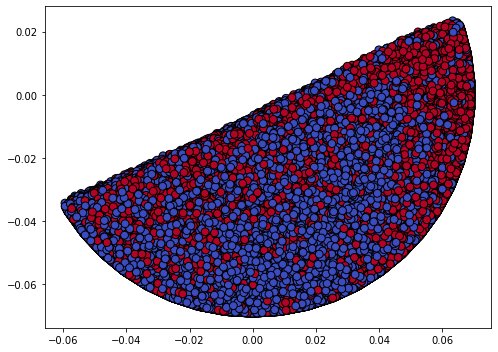

In [27]:
predicted_old = extrap.plot_particles(extrap.get_particle_coords(40), id_dict, 0)
extrapolated_lacey = []
init_time = 4
extrapolation_delta = 0.5
extrapolated_time = [init_time]
limit = 32


for i in range(limit):
    if i == limit-1:
        plt.figure(figsize=(8,12))
        predicted_new = extrap.plot_particles(extrap.extrapolate_particles(predicted_old, pos_dict_split), id_dict, 1)
        plt.show()
    else:
        predicted_new = extrap.plot_particles(extrap.extrapolate_particles(predicted_old, pos_dict_split), id_dict, 0)
        mass_1, mass_2, conc = lacey.bining(b_coords, div_size, predicted_new, cut_off)

        Lacey_index = lacey.Lacey(mass_1, mass_2, conc, cut_off, len(predicted_new))
        extrapolated_lacey.append(Lacey_index)
        new_time = extrapolated_time[-1]+extrapolation_delta
        extrapolated_time.append(new_time)
        #print(Lacey_index, new_time)
        predicted_old = predicted_new

In [26]:
extrap.deck.timestepValues[40]

4.000000120990002

In [21]:
directory_path = sim_path

# Initialize an empty list to store the NumPy arrays
Lacey_actual = []

# Loop through the files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('test_Report.csv'):  # Check if the file is a CSV file
        file_path = os.path.join(directory_path, filename)
        data = np.genfromtxt(file_path, delimiter=',', skip_header=0)  # Assuming CSV has headers
        Lacey_actual.append(data)

Lacey_actual = np.array(Lacey_actual)[0]

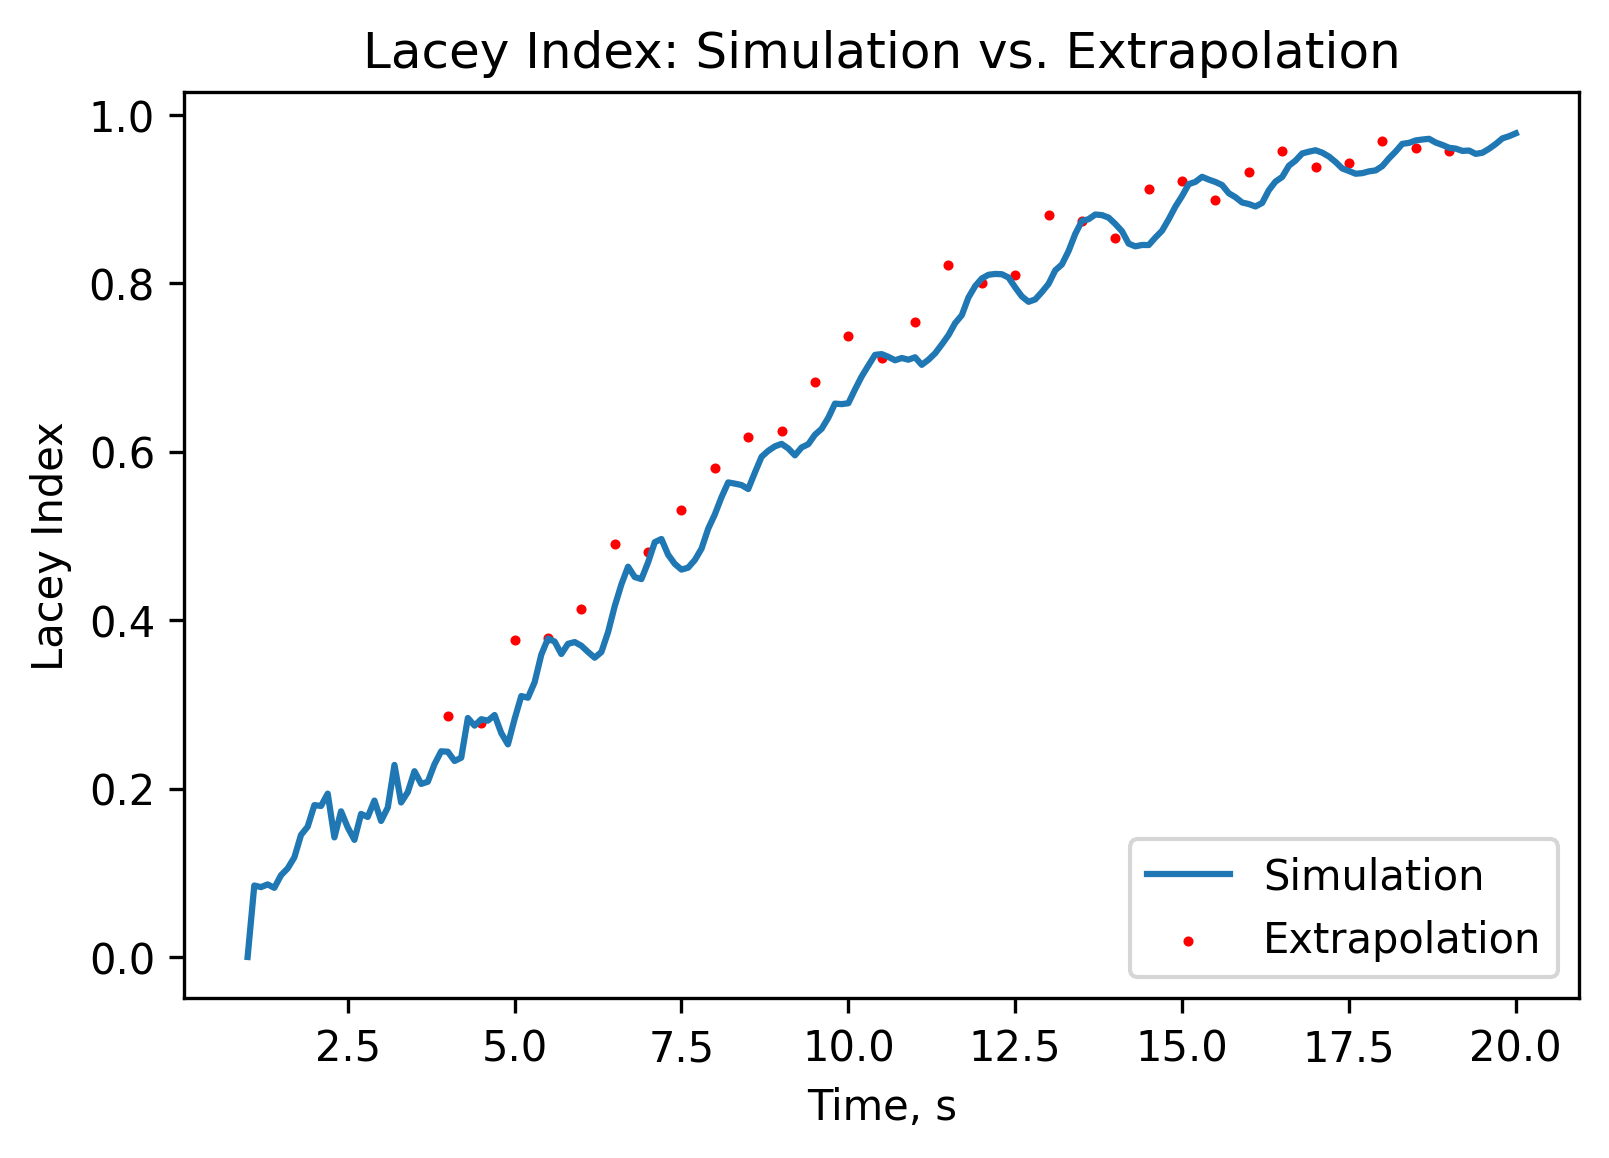

In [28]:
plt.figure(dpi=300)
plt.plot(extrap.deck.timestepValues[extrap.start:], Lacey_actual[extrap.start:, 1], label = "Simulation")
plt.scatter(extrapolated_time[:-1], extrapolated_lacey, c="red", s=2, label = "Extrapolation")

plt.xlabel('Time, s')
plt.ylabel('Lacey Index')
plt.title('Lacey Index: Simulation vs. Extrapolation')
plt.legend(loc="lower right")